# 1.2 Handling Missing Values in DEC Data (Public Buildings)

<hr style="border:2px solid black">

# Outline <a id='index'></a>
1. [Introduction](#1)
1. [Data Visualization and Cleaning](#2)
    * [2.1 Continuous Data Analysis](#2.1)
    * [2.2 Categorical Data Analysis](#2.2)
1. [Conclusion](#3)
1. [References](#4)

<hr style="border:2px solid black">

# 1. Introduction [^](#index) <a name="1"></a> 

<div style="text-indent: 2em;text-align: justify;">
&nbsp;&nbsp;&nbsp;&nbsp;In this notebook, all data from Display Energy Certificate (DEC)
are visualize and cleaned [1].
Similarly, there are two types of data: categorical and continuous. 
Since the models will not accept any NAN or null values, any cells that have NAN values will
be replaced
depend on the type of data. First, each feature is visualized using the histogram, and
the NAN rows or columns are filled out depending on the data type. Any NAN for categorical
features will be removed after merging with the London Building Stock Model (LBSM) to avoid bias [2].
It is started by reading the CSV file provided.
Then,  repetitive columns are dropped. Finally, before we started 
the cleaning process, we removed columns with NAN values of more than 40% as
they were insignificant and may affect the model's performance later.<div>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pb='/home/ffs223/Downloads/GHGs_coding/DOM_Main code/Job Portfolio/MRES_Project/0.2_PB_1423_32B.csv'
pb_df=pd.read_csv(pb)

pb_df

,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_OPERATIONAL_RATING,YR1_OPERATIONAL_RATING,YR2_OPERATIONAL_RATING,OPERATIONAL_RATING_BAND,...,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,POSTTOWN,NOMINATED_DATE,OR_ASSESSMENT_END_DATE,LODGEMENT_DATETIME,OCCUPANCY_LEVEL,UPRN,UPRN_SOURCE,year
0,93750320042019030807472783410070,ARK SWIFT PRIMARY ACADEMY,Canberra Primary School,Australia Road,W12 7PT,302052480001,106.0,112.0,95.0,E,...,Hammersmith and Fulham,Hammersmith,LONDON,2019-03-02,2018-12-31,2019-03-08 07:47:27,Standard Occupancy,34018350.0,Address Matched,2019
1,93750320042020031613373084410070,ARK SWIFT PRIMARY ACADEMY,Canberra Primary School,Australia Road,W12 7PT,302052480001,91.0,106.0,112.0,D,...,Hammersmith and Fulham,Hammersmith,LONDON,2020-03-02,2020-01-01,2020-03-16 13:37:30,Standard Occupancy,34018350.0,Address Matched,2020
2,43059380342020031612160424700070,NaN,Fulham Primary School,Halford Road,SW6 1JU,130568720000,99.0,112.0,121.0,D,...,Hammersmith and Fulham,Chelsea and Fulham,LONDON,2020-02-28,2020-01-01,2020-03-16 12:16:04,Standard Occupancy,34071880.0,Address Matched,2020
3,14635490802016112318511530710220,CLINICAL RESEARCH BUILDING,Imperial College London,Hammersmith Campus,W12 0NN,885459730001,219.0,210.0,NaN,G,...,Hammersmith and Fulham,Hammersmith,LONDON,2016-03-31,2016-01-03,2016-11-23 18:51:15,Extended Occupancy,34020826.0,Address Matched,2016
4,56018680922016113014072810090210,NaN,Hammersmith Fire Station,190-192 Shepherds Bush Road,W6 7NL,113582090000,69.0,54.0,56.0,C,...,Hammersmith and Fulham,Hammersmith,LONDON,2016-12-01,2016-09-04,2016-11-30 14:07:28,Standard Occupancy,34133162.0,Address Matched,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42719,fccdc7152fc3eef260200a2e82bfcc5b0478e26cc3f353...,55 Gresham Street,NaN,NaN,EC2V 7EL,10004389572,105.0,NaN,NaN,E,...,City of London,Cities of London and Westminster,LONDON,2023-03-31,2023-01-01,2023-06-29 12:28:06,Standard Occupancy,95515117.0,Energy Assessor,2023
42720,a1e1d6785ff801178fb6f52d52338eb9f8b6b41ae0202a...,EAST WING,Barts Health NHS Trust,St. Bartholomew's Hospital,EC1A 7BE,558220410004,199.0,190.0,175.0,G,...,City of London,Cities of London and Westminster,LONDON,2023-06-30,2023-04-01,2023-06-23 11:42:33,Standard Occupancy,NaN,NaN,2023
42721,2cfb92f92a01babcc7ca53a374f2e52b1d04a7bd85806a...,NORTH BLOCK,Barts Health NHS Trust,St. Bartholomew's Hospital,EC1A 7BE,558220410009,202.0,192.0,177.0,G,...,City of London,Cities of London and Westminster,LONDON,2023-06-30,2023-04-01,2023-06-23 08:43:28,Standard Occupancy,NaN,NaN,2023
42722,02f0eca29b945e4b057cbe8627d08cf681c5304a64db1f...,Barbican Estate Office,"3 Barbican, Lauderdale Place",NaN,EC2Y 8EN,10005342534,61.0,NaN,NaN,C,...,City of London,Cities of London and Westminster,London,2023-11-01,2023-08-01,2023-12-04 12:37:09,Standard Occupancy,95506950.0,Address Matched,2023


In [3]:
pb_df.columns

Index(['LMK_KEY', 'ADDRESS1', 'ADDRESS2', 'ADDRESS3', 'POSTCODE',
       'BUILDING_REFERENCE_NUMBER', 'CURRENT_OPERATIONAL_RATING',
       'YR1_OPERATIONAL_RATING', 'YR2_OPERATIONAL_RATING',
       'OPERATIONAL_RATING_BAND', 'ELECTRIC_CO2', 'HEATING_CO2',
       'RENEWABLES_CO2', 'PROPERTY_TYPE', 'INSPECTION_DATE', 'LOCAL_AUTHORITY',
       'CONSTITUENCY', 'COUNTY', 'LODGEMENT_DATE', 'MAIN_BENCHMARK',
       'MAIN_HEATING_FUEL', 'OTHER_FUEL', 'SPECIAL_ENERGY_USES',
       'RENEWABLE_SOURCES', 'TOTAL_FLOOR_AREA', 'ANNUAL_THERMAL_FUEL_USAGE',
       'TYPICAL_THERMAL_FUEL_USAGE', 'ANNUAL_ELECTRICAL_FUEL_USAGE',
       'TYPICAL_ELECTRICAL_FUEL_USAGE', 'RENEWABLES_FUEL_THERMAL',
       'RENEWABLES_ELECTRICAL', 'YR1_ELECTRICITY_CO2', 'YR2_ELECTRICITY_CO2',
       'YR1_HEATING_CO2', 'YR2_HEATING_CO2', 'YR1_RENEWABLES_CO2',
       'YR2_RENEWABLES_CO2', 'AIRCON_PRESENT', 'AIRCON_KW_RATING',
       'ESTIMATED_AIRCON_KW_RATING', 'AC_INSPECTION_COMMISSIONED',
       'BUILDING_ENVIRONMENT', 'BUILDI

In [69]:
pb_df.isnull().sum()

LMK_KEY                              0
ADDRESS1                         19585
ADDRESS2                           642
ADDRESS3                          6363
POSTCODE                             0
BUILDING_REFERENCE_NUMBER            0
CURRENT_OPERATIONAL_RATING           0
YR1_OPERATIONAL_RATING            7262
YR2_OPERATIONAL_RATING           10962
OPERATIONAL_RATING_BAND              0
ELECTRIC_CO2                         0
HEATING_CO2                          0
RENEWABLES_CO2                    2589
PROPERTY_TYPE                        0
INSPECTION_DATE                      0
LOCAL_AUTHORITY                      0
CONSTITUENCY                         0
COUNTY                           14706
LODGEMENT_DATE                       0
MAIN_BENCHMARK                       2
MAIN_HEATING_FUEL                    0
OTHER_FUEL                       42724
SPECIAL_ENERGY_USES              41690
RENEWABLE_SOURCES                41200
TOTAL_FLOOR_AREA                     0
ANNUAL_THERMAL_FUEL_USAGE

In [3]:
# Convert the date column to datetime 
pb_df['INSPECTION_DATE'] = pd.to_datetime(pb_df['INSPECTION_DATE'], errors='coerce')

# Check the minimum and maximum dates
min_d = pb_df['INSPECTION_DATE'].min()
max_d = pb_df['INSPECTION_DATE'].max()

min_d, max_d


(Timestamp('2010-04-01 00:00:00'), Timestamp('2023-12-29 00:00:00'))

In [4]:
nan_pb= { 
   
'ADDRESS1':19585,
'ADDRESS2':642,
'ADDRESS3':6363,
'YR1_OPERATIONAL_RATING':7262,
'YR2_OPERATIONAL_RATING':10962,
'RENEWABLES_CO2':2589,
'COUNTY':14706,
'MAIN_BENCHMARK':2,
'OTHER_FUEL':42724,
'SPECIAL_ENERGY_USES':41690,
'RENEWABLE_SOURCES':41200,
'ANNUAL_THERMAL_FUEL_USAGE':1285,
'TYPICAL_THERMAL_FUEL_USAGE':1285,
'ANNUAL_ELECTRICAL_FUEL_USAGE':1285,
'TYPICAL_ELECTRICAL_FUEL_USAGE':1285,
'RENEWABLES_FUEL_THERMAL':1285,
'RENEWABLES_ELECTRICAL':1285,
'YR1_ELECTRICITY_CO2': 7262,
'YR2_ELECTRICITY_CO2':10962,
'YR1_HEATING_CO2':7262,
'YR2_HEATING_CO2':10962,
'YR1_RENEWABLES_CO2':9478,
'YR2_RENEWABLES_CO2':13082,
'AIRCON_KW_RATING':40068,
'ESTIMATED_AIRCON_KW_RATING':20354,
'OCCUPANCY_LEVEL':76,
'UPRN':8874,
'UPRN_SOURCE':8874

    }

pb_nan_df = pd.DataFrame(list(nan_pb.items()), columns=['Column', 'NaN_Count'])#convert nan list into data frame:create col in the df
pb_nan_df

,Column,NaN_Count
0,ADDRESS1,19585
1,ADDRESS2,642
2,ADDRESS3,6363
3,YR1_OPERATIONAL_RATING,7262
4,YR2_OPERATIONAL_RATING,10962
5,RENEWABLES_CO2,2589
6,COUNTY,14706
7,MAIN_BENCHMARK,2
8,OTHER_FUEL,42724
9,SPECIAL_ENERGY_USES,41690


In [10]:
def plot_nan(nan_df, total_rows, title, colour=None):
    """
    Plot the bar graph for NAN features.
    
    Parameters:
    - nan_df : Dataframe that has NAN features
    - total_rows : Total number of rows from EPC
    - title: Title for the bar graph plotting
    - colour : Colour of the bar graph
    """

    # Calculate the percentage of NaN values
    nan_df['NaN_%'] = (nan_df['NaN_Count'] / total_rows) * 100
    
    # Plotting
    plt.figure(figsize=(5, 3), dpi=500)
    bars = plt.barh(nan_df['Column'], nan_df['NaN_%'], color=colour)
    plt.xlabel('Percentage of NaN values', fontsize=8)
    plt.title(title, fontsize=10)
    plt.grid(axis='x')
    plt.yticks(fontsize=5)
    plt.xticks(fontsize=6)

    # Visualize percentage value at the right side of the bar
    for bar in bars:
        w = bar.get_width()
        label = f'{w:.1f}%'
        plt.text(w + 0.5, bar.get_y() + bar.get_height() / 2, label, va='center', fontsize=6, color='black')

    plt.show()


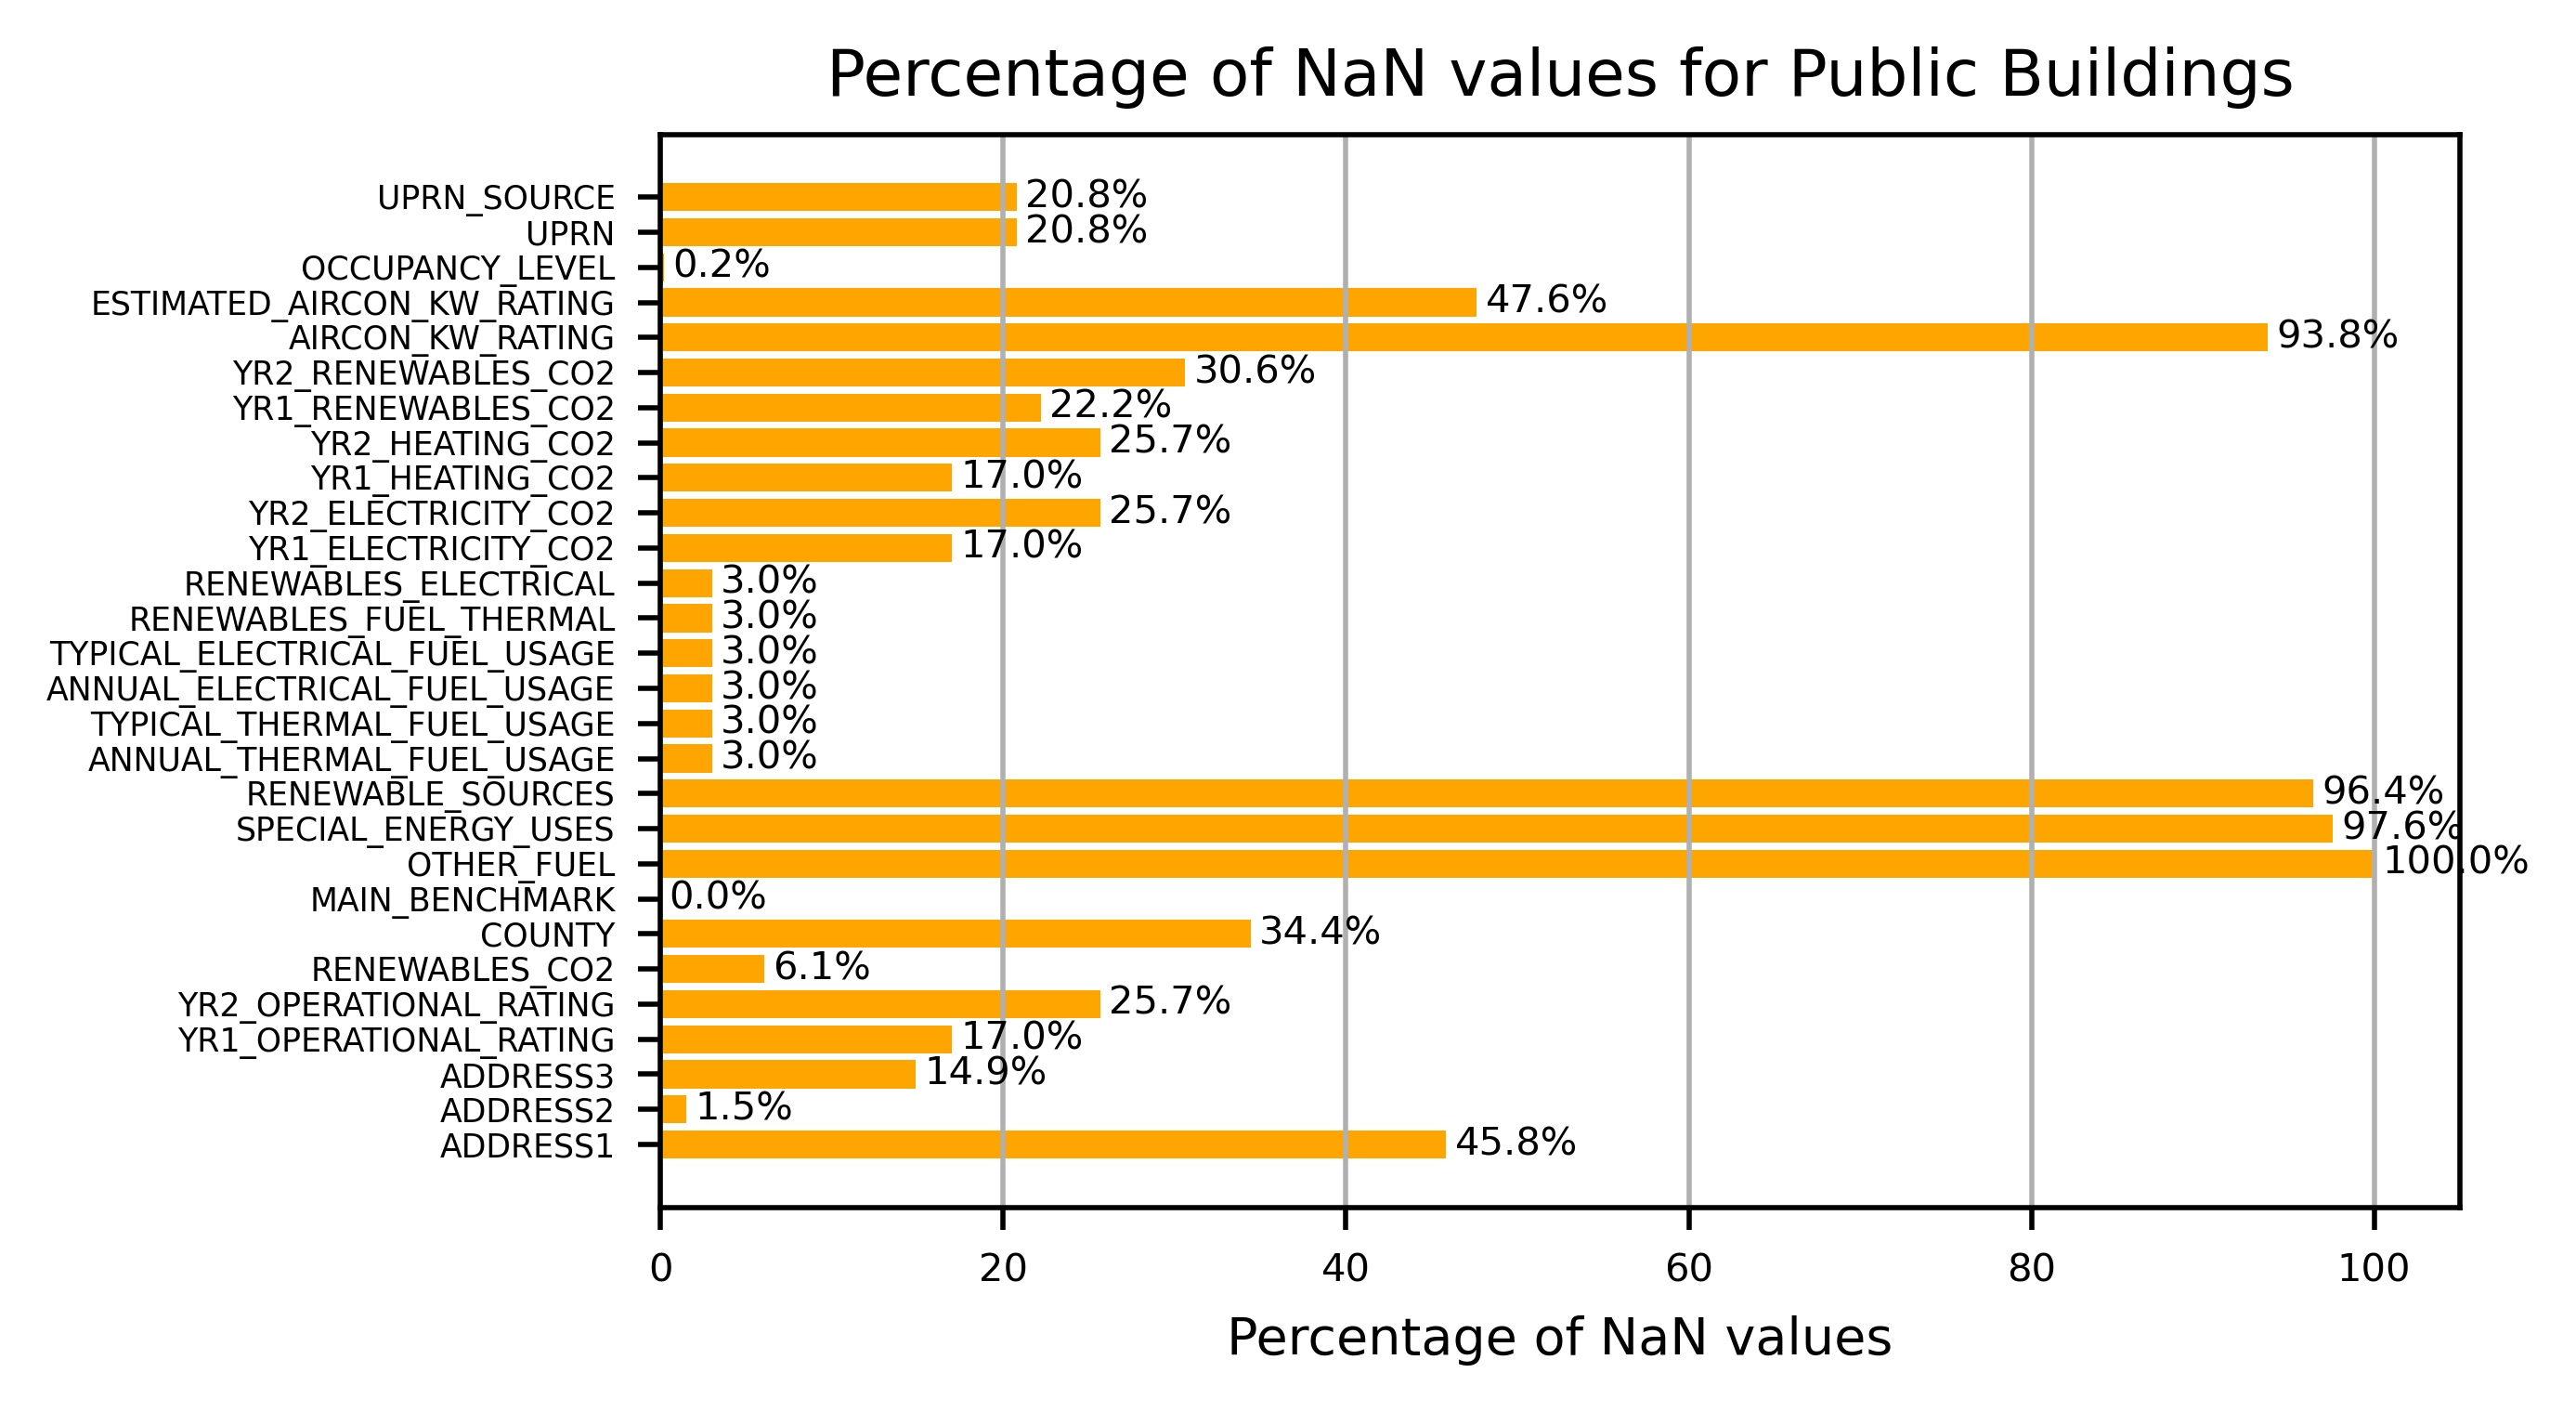

In [11]:
plot_nan(pb_nan_df, 42724, 'Percentage of NaN values for Public Buildings','orange')

<div style="text-indent: 2em;text-align: justify;">
&nbsp;&nbsp;&nbsp;&nbsp;Based on the plotting above, there are six features that more than 40% are dropped. The features
are listed in the cell below.<div>

In [ ]:
drop_pb=['ESTIMATED_AIRCON_KW_RATING','AIRCON_KW_RATING','RENEWABLE_SOURCES',
      'SPECIAL_ENERGY_USES','OTHER_FUEL','ADDRESS1']
pb_df.drop(columns=drop_pb, inplace=True)

# 2. Data Visualization and Cleaning [^](#index) <a name="2"></a> 

<div style="text-indent: 2em;text-align: justify;">
&nbsp;&nbsp;&nbsp;&nbsp;In this section, the features are handled based on its data type. The continous data type is celaned 
by replacing the NAN values with the mean between two values of cell located between the empty cell using the 
average mean function.Moreover, plot_continous and plot_categorical are functions used to visualized the features
(columns).<div>

In [14]:
def plot_continous(df, feature, x_rotation=90, x_fontsize=10, edge_color='black', 
                   figsize=(10, 6),colour='green', x_limits=None,bins=30):
    """
    Plots the distribution for continous data.
    
    Parameters:
    - df :Dataframe from DEC
    - feature: Referring to the columns from DEC
    -x_rotation: 90 degree to display label axis at x-axis
    -x_fontsize: The size of the font for lables at x-axis
    -edge colour:Outline colour for the bar graph
    -figsize: The dimension of the plot, width and height
    -colour: Colour of the bar graph
    -x_limit: Scaling for x_axis
    -bins: Number of intervals in the bar plot
      
    """
    
    freq = (df[feature].value_counts())# Count the frequency of each 
    
    plt.figure(figsize=figsize)
    plt.hist(df[feature], bins=bins, color=colour, edgecolor=edge_color)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    if x_limits is not None:
        plt.xlim(x_limits)
        
    plt.xticks(rotation=x_rotation, fontsize=x_fontsize)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    

In [15]:
def average_mean(df, feature):
    """
    Calculate mean value to replace NAN values.
    
    Parameters:
    - df :Dataframe from DEC
    - feature: Referring to the column from EPC
    """
    
    df[feature] = df[feature].astype(float)
    
    # Loop through the rows of the dataframe
    for i in range(len(df)):
        if pd.isna(df.loc[i, feature]):
            
            # Determine the previous and the next value at the NaN cell
            previous = df.loc[i-1, feature] if i > 0 else np.nan
            next_val = df.loc[i+1, feature] if i < len(df)-1 else np.nan
            
            # Calculate the mean of the previous and next values
            if pd.notna(previous) and pd.notna(next_val):
                mean = (previous + next_val) / 2
            elif pd.notna(previous):
                mean = previous
            elif pd.notna(next_val):
                mean = next_val
            else:
                mean = np.nan
            
            # Replace the NaN cell with the mean value
            df.loc[i, feature] = mean
            
    return df


### 2.1 Continous Data Analysis [^](#index) <a name="2.1"></a> 

Below are the list for the continous data:
    

1. YR1_OPERATIONAL_RATING
2. YR2_OPERATIONAL_RATING
3. ANNUAL_THERMAL_FUEL_USAGE
4. TYPICAL_THERMAL_USAGE
5. ANNUAL_ELECTRICAL_USAGE
6. TYPICAL_ELECTRICAL_USAGE
7. RENEWABLES_FUEL_THERMAL
8. RENEWABLES_ELECTRICAL
9. YR1_ELECTRICITY_CO2
10. YR2_ELECTRICITY_CO2
11. YR1_HEATING_CO2
12. YR2_HEATING_CO2
13. YR1_RENEWABLES_CO2
14. YR2_RENEWABLES_CO2
15. RENEWABLES_CO2

In [20]:
pb_df.isnull().sum()

LMK_KEY                              0
ADDRESS2                           642
ADDRESS3                          6363
POSTCODE                             0
BUILDING_REFERENCE_NUMBER            0
CURRENT_OPERATIONAL_RATING           0
YR1_OPERATIONAL_RATING            7262
YR2_OPERATIONAL_RATING           10962
OPERATIONAL_RATING_BAND              0
ELECTRIC_CO2                         0
HEATING_CO2                          0
RENEWABLES_CO2                    2589
PROPERTY_TYPE                        0
INSPECTION_DATE                      0
LOCAL_AUTHORITY                      0
CONSTITUENCY                         0
COUNTY                           14706
LODGEMENT_DATE                       0
MAIN_BENCHMARK                       2
MAIN_HEATING_FUEL                    0
TOTAL_FLOOR_AREA                     0
ANNUAL_THERMAL_FUEL_USAGE         1285
TYPICAL_THERMAL_FUEL_USAGE        1285
ANNUAL_ELECTRICAL_FUEL_USAGE      1285
TYPICAL_ELECTRICAL_FUEL_USAGE     1285
RENEWABLES_FUEL_THERMAL  

In [16]:
pb_df['YR1_OPERATIONAL_RATING'].value_counts()

YR1_OPERATIONAL_RATING
93.0     503
91.0     502
90.0     501
92.0     489
87.0     487
        ... 
428.0      1
689.0      1
325.0      1
765.0      1
469.0      1
Name: count, Length: 399, dtype: int64

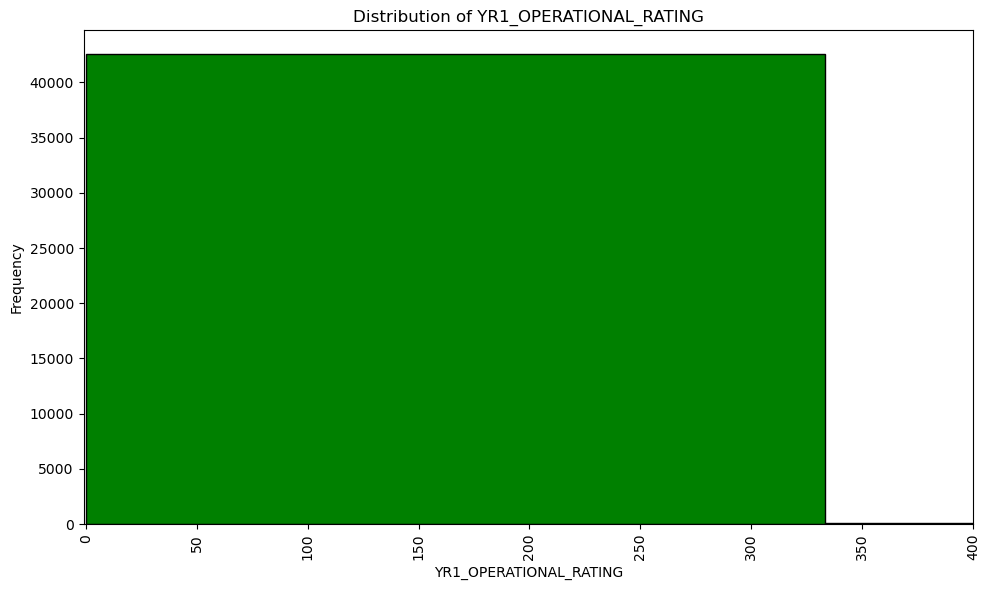

In [17]:
pb_df = average_mean(pb_df, 'YR1_OPERATIONAL_RATING')
plot_continous(pb_df, 'YR1_OPERATIONAL_RATING', x_rotation=90, x_fontsize=10, x_limits=(-1, 400))

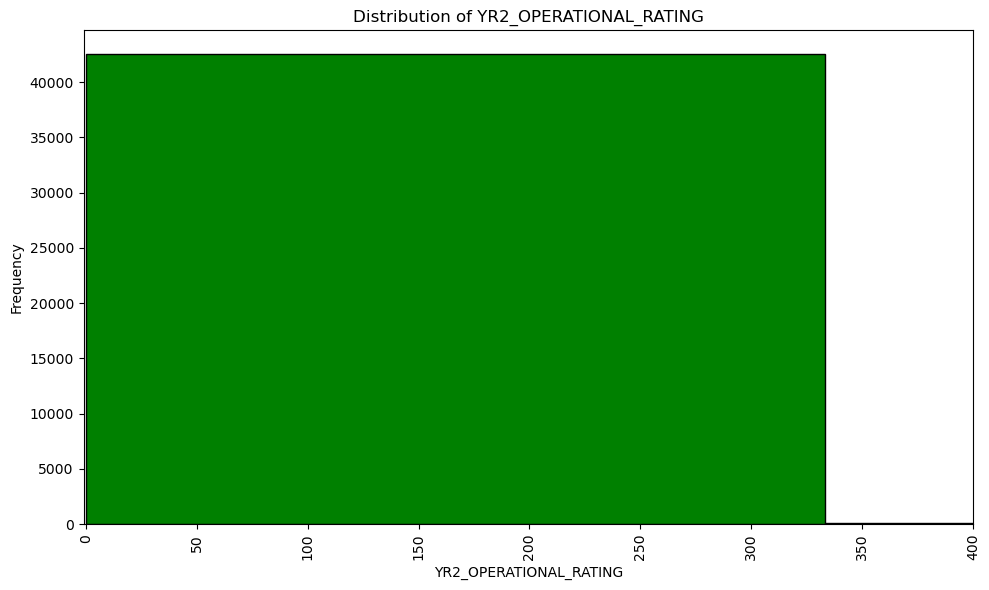

In [18]:
pb_df = average_mean(pb_df, 'YR2_OPERATIONAL_RATING')
plot_continous(pb_df, 'YR2_OPERATIONAL_RATING', x_rotation=90, x_fontsize=10, x_limits=(-1, 400))

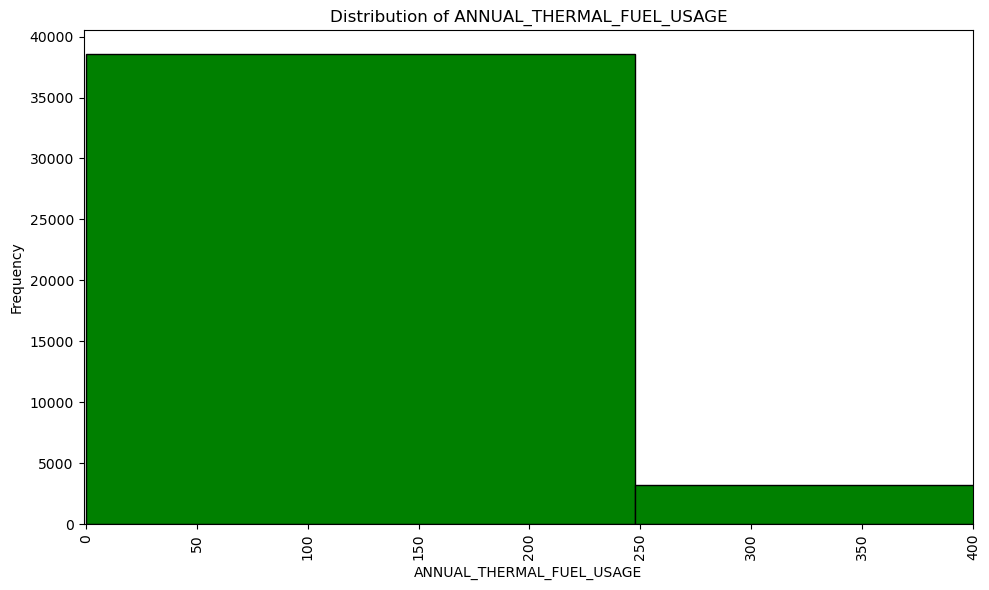

In [19]:
pb_df = average_mean(pb_df, 'ANNUAL_THERMAL_FUEL_USAGE')
plot_continous(pb_df, 'ANNUAL_THERMAL_FUEL_USAGE', x_rotation=90, x_fontsize=10, x_limits=(-1, 400))

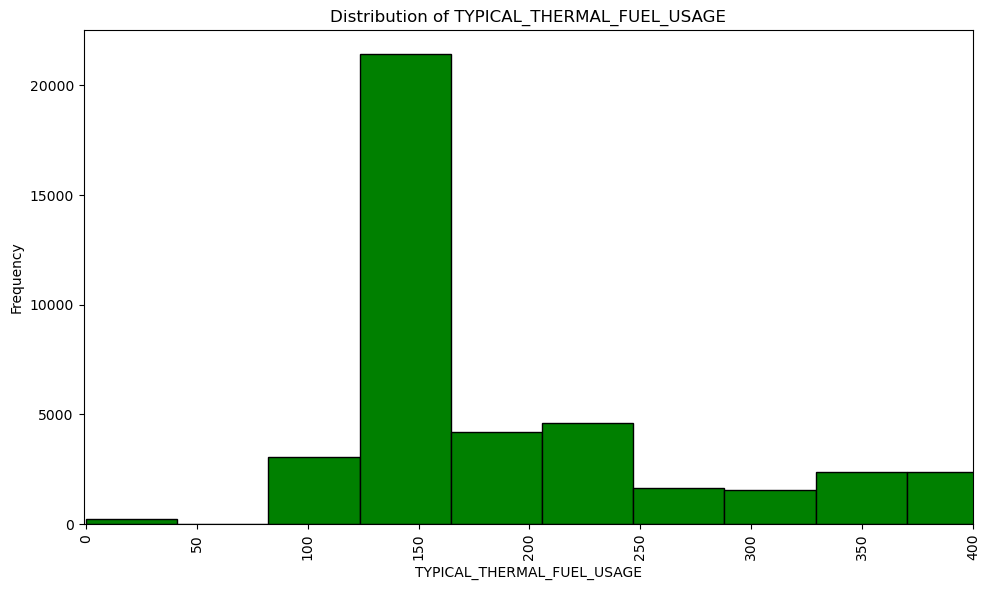

In [20]:
pb_df = average_mean(pb_df, 'TYPICAL_THERMAL_FUEL_USAGE')
plot_continous(pb_df, 'TYPICAL_THERMAL_FUEL_USAGE', x_rotation=90, x_fontsize=10, x_limits=(-1, 400))

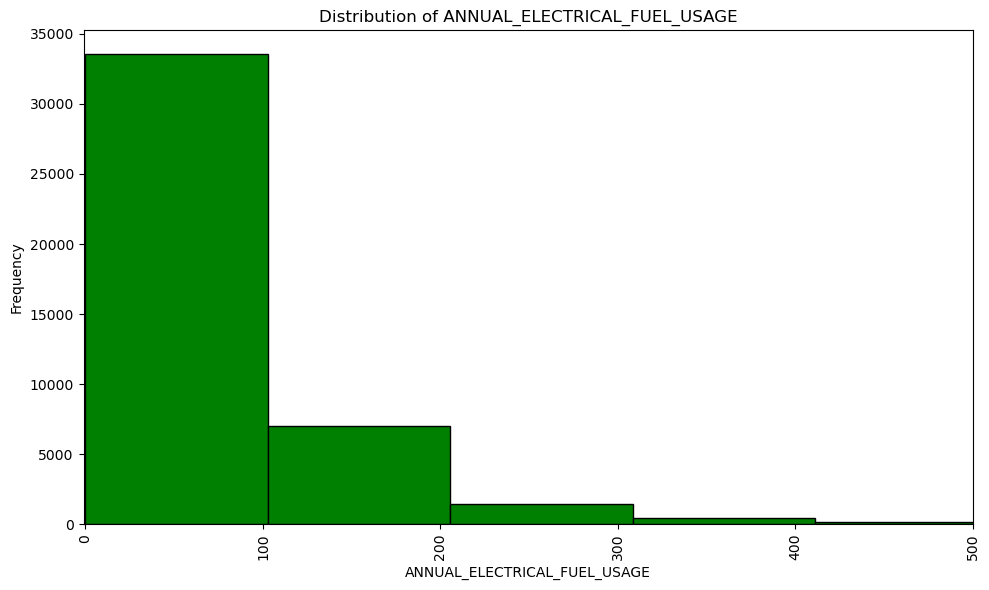

In [21]:
pb_df = average_mean(pb_df, 'ANNUAL_ELECTRICAL_FUEL_USAGE')
plot_continous(pb_df, 'ANNUAL_ELECTRICAL_FUEL_USAGE', x_rotation=90, x_fontsize=10, x_limits=(-1, 500))

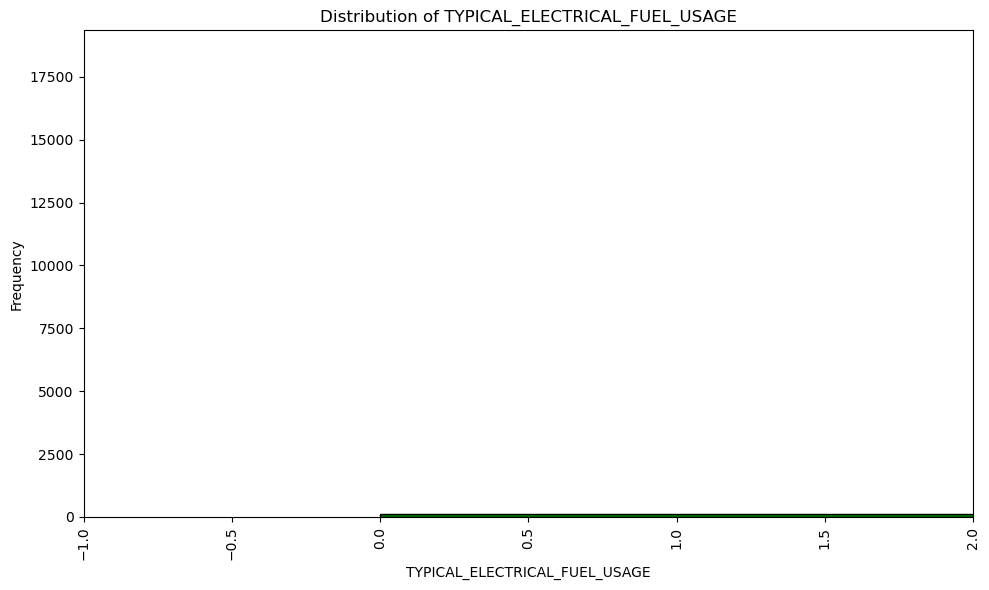

In [22]:
pb_df = average_mean(pb_df, 'TYPICAL_ELECTRICAL_FUEL_USAGE')
plot_continous(pb_df, 'TYPICAL_ELECTRICAL_FUEL_USAGE', x_rotation=90, x_fontsize=10, x_limits=(-1, 2))

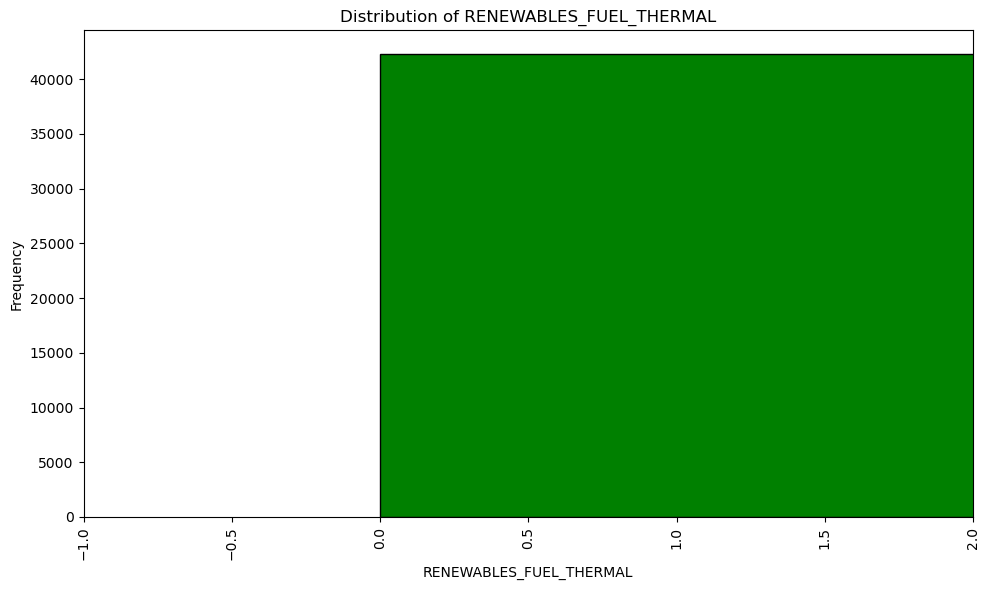

In [23]:
pb_df = average_mean(pb_df, 'RENEWABLES_FUEL_THERMAL')
plot_continous(pb_df, 'RENEWABLES_FUEL_THERMAL', x_rotation=90, x_fontsize=10, x_limits=(-1, 2))

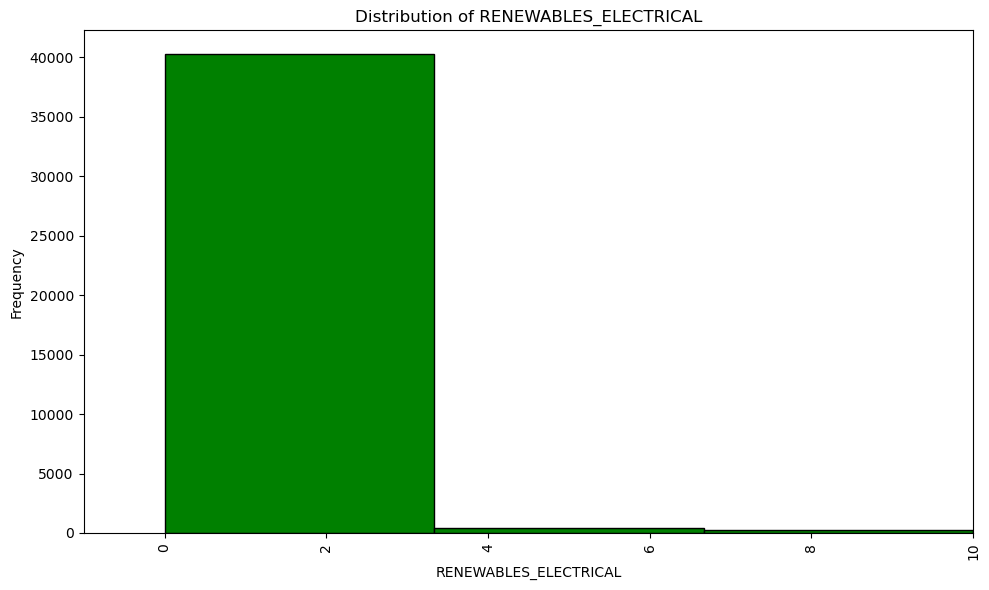

In [24]:
pb_df = average_mean(pb_df, 'RENEWABLES_ELECTRICAL')
plot_continous(pb_df, 'RENEWABLES_ELECTRICAL', x_rotation=90, x_fontsize=10, x_limits=(-1, 10))

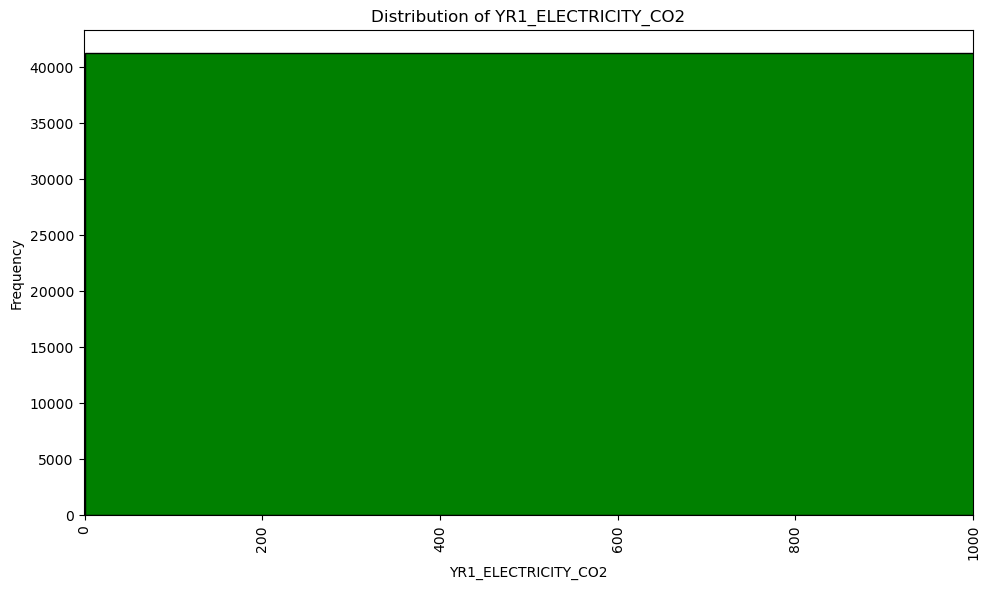

In [29]:
pb_df = average_mean(pb_df, 'YR1_ELECTRICITY_CO2')
plot_continous(pb_df, 'YR1_ELECTRICITY_CO2', x_rotation=90, x_fontsize=10, x_limits=(-1, 1000))

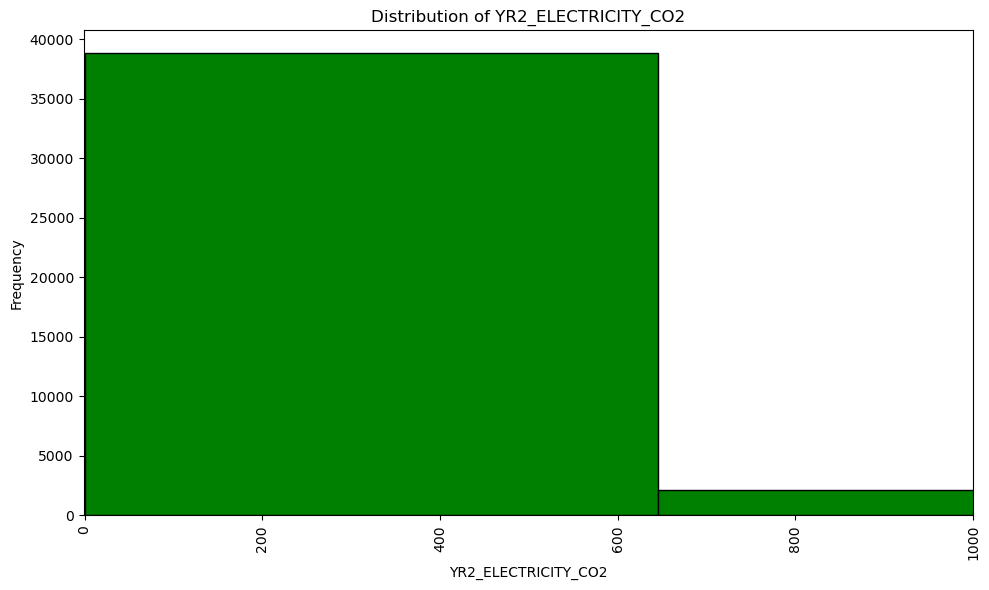

In [25]:
pb_df = average_mean(pb_df, 'YR2_ELECTRICITY_CO2')
plot_continous(pb_df, 'YR2_ELECTRICITY_CO2', x_rotation=90, x_fontsize=10, x_limits=(-1, 1000))

In [26]:
pb_df = average_mean(pb_df, 'YR2_HEATING_CO2')

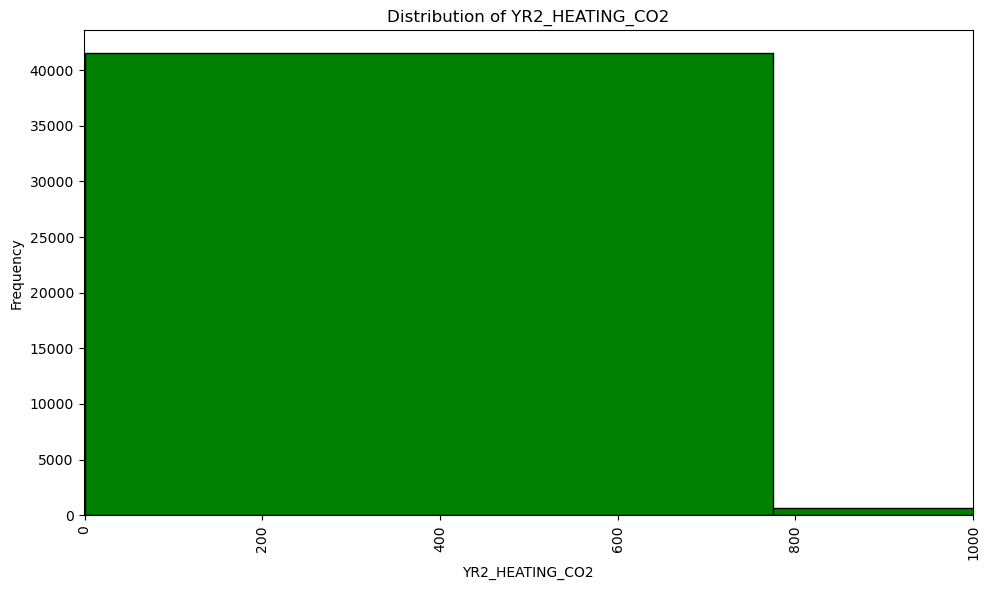

In [27]:
plot_continous(pb_df, 'YR2_HEATING_CO2', x_rotation=90, x_fontsize=10, x_limits=(-1, 1000))
                                                                                

In [28]:
pb_df = average_mean(pb_df, 'YR1_HEATING_CO2')

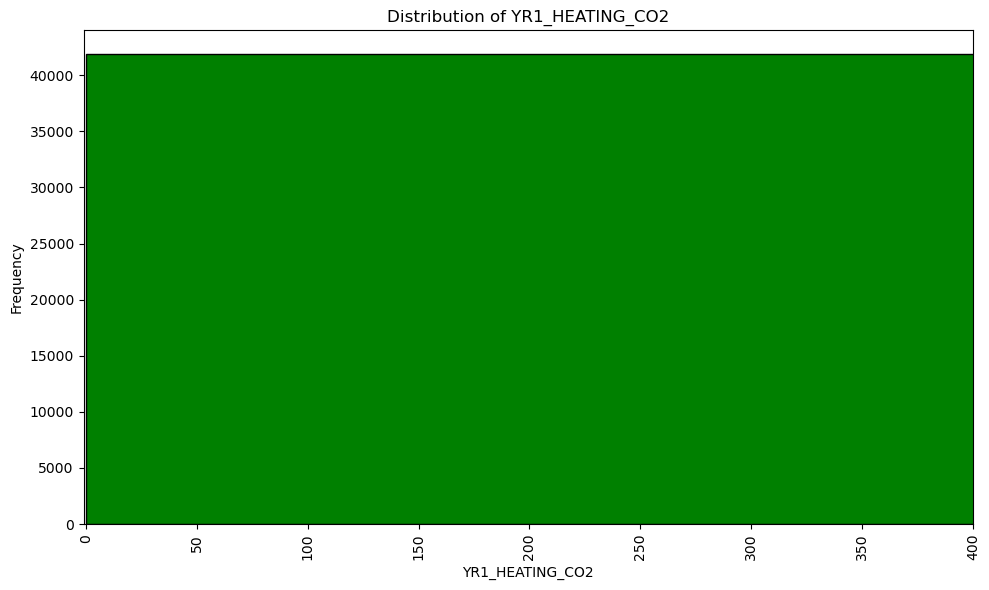

In [29]:
plot_continous(pb_df, 'YR1_HEATING_CO2', x_rotation=90, x_fontsize=10, x_limits=(-1, 400))
                                                                                

In [30]:
pb_df = average_mean(pb_df, 'YR1_RENEWABLES_CO2')

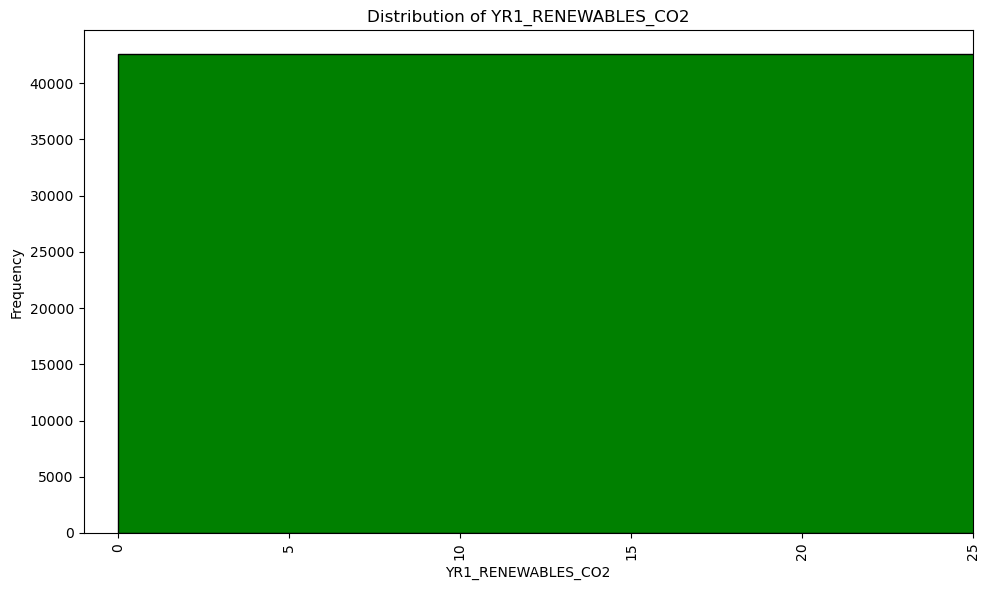

In [31]:
plot_continous(pb_df, 'YR1_RENEWABLES_CO2', x_rotation=90, x_fontsize=10, x_limits=(-1, 25))
                                                                                

In [32]:
pb_df = average_mean(pb_df, 'YR2_RENEWABLES_CO2')

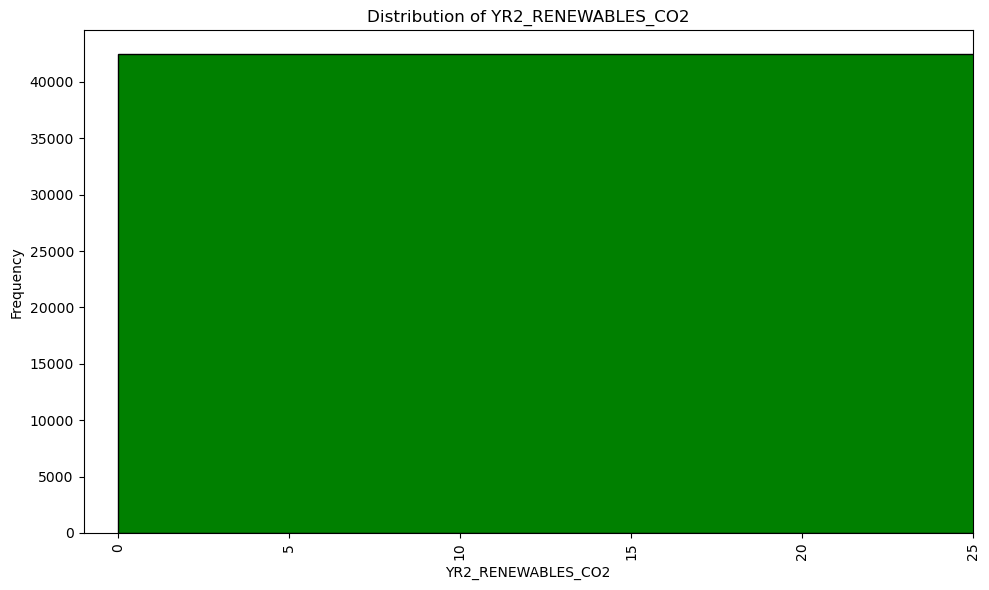

In [33]:
plot_continous(pb_df, 'YR2_RENEWABLES_CO2', x_rotation=90, x_fontsize=10, x_limits=(-1, 25))
                                                                                

In [34]:
pb_df = average_mean(pb_df, 'RENEWABLES_CO2')

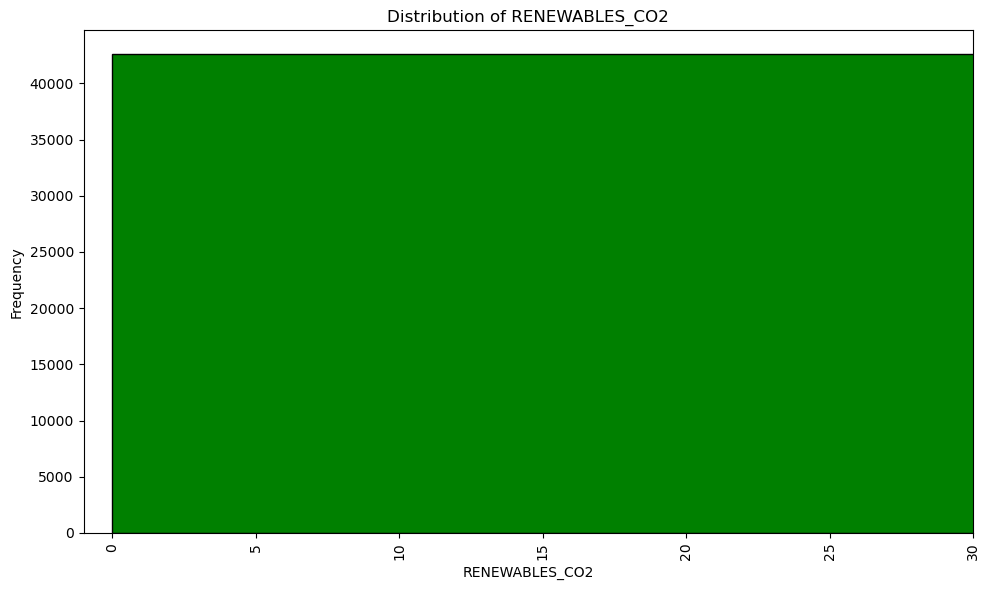

In [35]:
plot_continous(pb_df, 'RENEWABLES_CO2', x_rotation=90, x_fontsize=10, x_limits=(-1, 30))

### 2.2 Categorical Data Analysis [^](#index) <a name="2.2"></a> 

Below are the list for the categorical data:
    

1. OCCUPANCY_LEVEL
2. MAIN_BENCHMARK
3. COUNTY
4. ADDRESS 3
5. ADDRESS 2

In [38]:

def plot_categorical(df, threshold=2000, column=None, x_rotation=90, x_fontsize=9, figsize=(10, 6), colour='green'):
    """"

    Parameters:
    - df: The DataFrame containing the data.
    - threshold (int): It is the minimum frequency to filter categories where the default
                      for this dataframe is 2000.
    - column (str): Plot specific feature in the dataframe.
    - x_rotation (int): Rotation angle for x label, default is 90 degree.
    - x_fontsize (int): Font size for x label, default is 10.
  
    """
    if column:
        feature = [column]
    else:
        feature  = df.select_dtypes(include=['object', 'category']).columns

    for col in feature :
        counts = df[col].value_counts()

        # Test the frequency with the default threshold
        filtered = counts[counts > threshold]

        if not filtered.empty:
            plt.figure(figsize=figsize)
            plt.bar(filtered.index, filtered.values, color=colour, edgecolor='black')
            plt.title(f'Distribution of {col}',fontsize=14)
            plt.xlabel(col,fontsize=12)
            plt.ylabel('Frequency',fontsize=12)
            plt.xticks(rotation=x_rotation, fontsize=11)
            plt.yticks(fontsize=11)
            plt.grid(False)
            plt.show()

In [39]:
pb_df['OCCUPANCY_LEVEL'].value_counts().idxmax()

'Standard Occupancy'

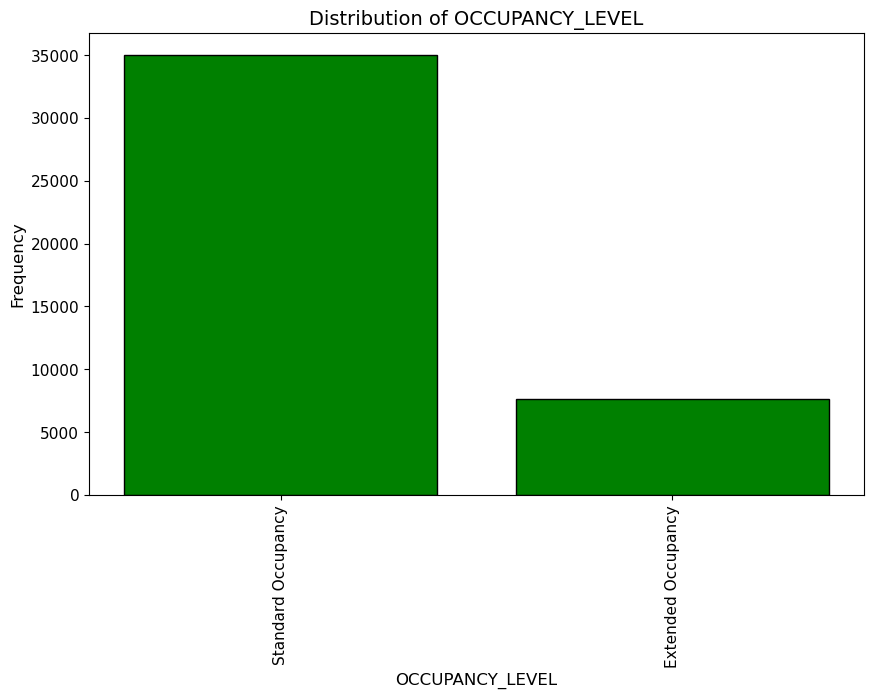

In [40]:
plot_categorical(pb_df,column='OCCUPANCY_LEVEL')

In [14]:
pb_df['MAIN_BENCHMARK'].value_counts()

MAIN_BENCHMARK
Schools And Seasonal Public Buildings    21828
University Campus                         4773
General Office                            3668
Clinic                                    1944
Dry Sports And Leisure Facility           1780
Hospital - Clinical And Research          1741
Emergency Services                        1414
General Accommodation                     1312
Cultural Activities                       1173
Long Term Residential                     1007
Swimming Pool Centre                       337
Entertainment Halls                        306
Laboratory Or Operating Theatre            229
Workshop                                   221
Long term residential                      182
Restaurant                                 149
High Street Agency                          93
Fitness And Health Centre                   90
University campus                           81
Hotel                                       77
Hospital - clinical and research            6

In [16]:
pb_df['MAIN_BENCHMARK'].value_counts().idxmax()

'Schools And Seasonal Public Buildings'

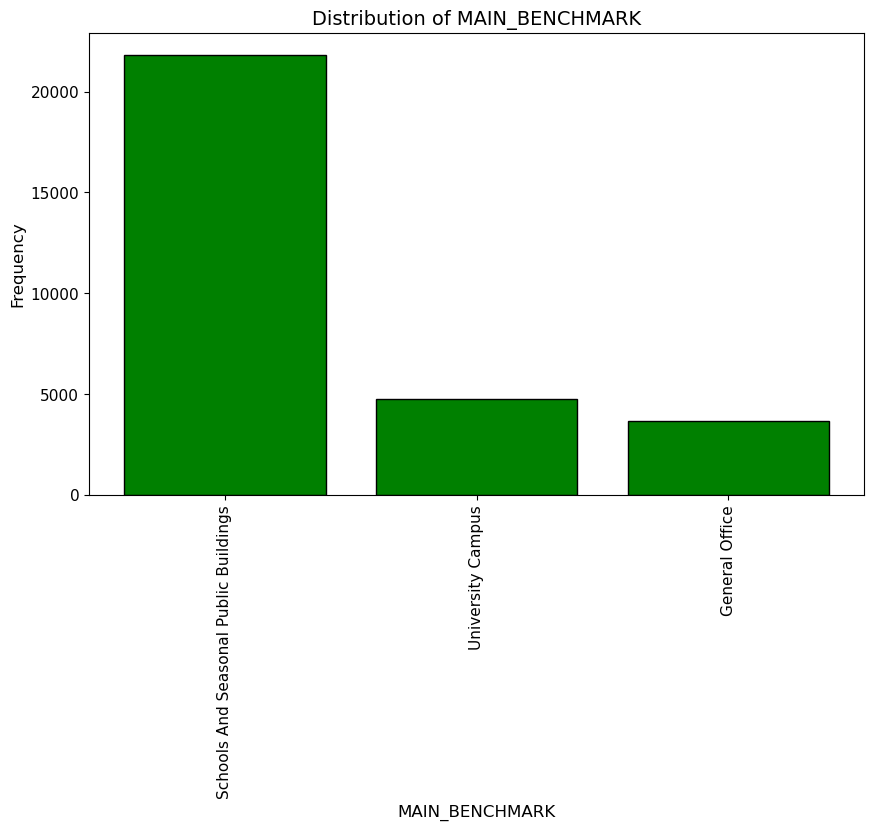

In [41]:
plot_categorical(pb_df,column='MAIN_BENCHMARK')

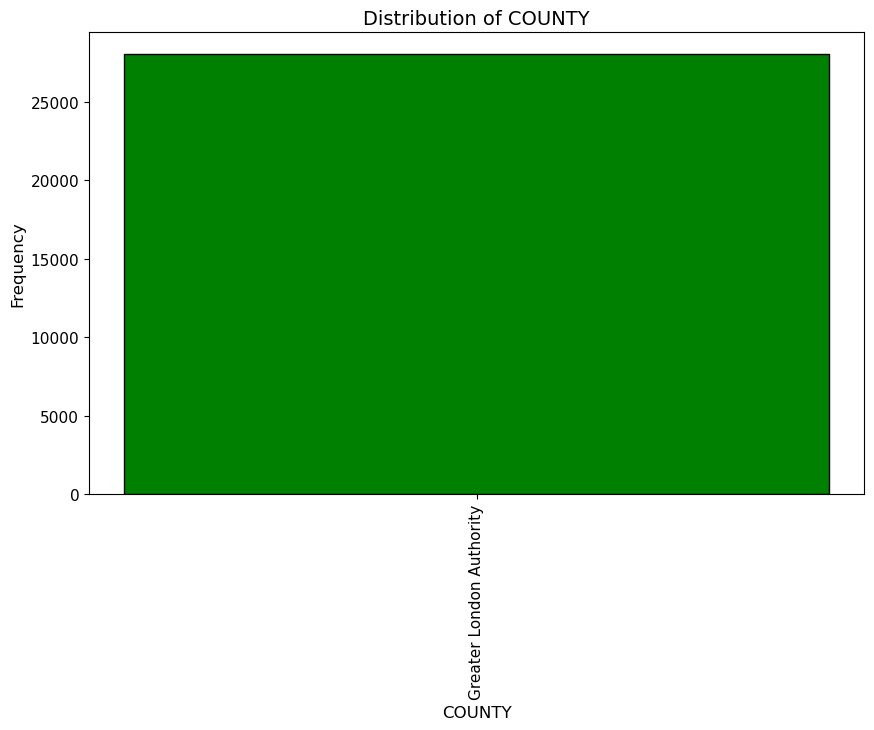

In [42]:
plot_categorical(pb_df,column='COUNTY')

In [43]:
pb_df['MAIN_BENCHMARK'].value_counts()

MAIN_BENCHMARK
Schools And Seasonal Public Buildings    21828
University Campus                         4773
General Office                            3668
Clinic                                    1944
Dry Sports And Leisure Facility           1780
Hospital - Clinical And Research          1741
Emergency Services                        1414
General Accommodation                     1312
Cultural Activities                       1173
Long Term Residential                     1007
Swimming Pool Centre                       337
Entertainment Halls                        306
Laboratory Or Operating Theatre            229
Workshop                                   221
Long term residential                      182
Restaurant                                 149
High Street Agency                          93
Fitness And Health Centre                   90
University campus                           81
Hotel                                       77
Hospital - clinical and research            6

In [44]:
pb_df.isnull().sum()

LMK_KEY                              0
ADDRESS2                           642
ADDRESS3                          6363
POSTCODE                             0
BUILDING_REFERENCE_NUMBER            0
CURRENT_OPERATIONAL_RATING           0
YR1_OPERATIONAL_RATING               0
YR2_OPERATIONAL_RATING               0
OPERATIONAL_RATING_BAND              0
ELECTRIC_CO2                         0
HEATING_CO2                          0
RENEWABLES_CO2                       0
PROPERTY_TYPE                        0
INSPECTION_DATE                      0
LOCAL_AUTHORITY                      0
CONSTITUENCY                         0
COUNTY                           14706
LODGEMENT_DATE                       0
MAIN_BENCHMARK                       2
MAIN_HEATING_FUEL                    0
TOTAL_FLOOR_AREA                     0
ANNUAL_THERMAL_FUEL_USAGE            0
TYPICAL_THERMAL_FUEL_USAGE           0
ANNUAL_ELECTRICAL_FUEL_USAGE         0
TYPICAL_ELECTRICAL_FUEL_USAGE        0
RENEWABLES_FUEL_THERMAL  

In [45]:
drop_pb=['COUNTY','ADDRESS3','ADDRESS2'
      ]
pb_df.drop(columns=drop_pb, inplace=True)

In [46]:
pb_df

,LMK_KEY,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_OPERATIONAL_RATING,YR1_OPERATIONAL_RATING,YR2_OPERATIONAL_RATING,OPERATIONAL_RATING_BAND,ELECTRIC_CO2,HEATING_CO2,RENEWABLES_CO2,...,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,POSTTOWN,NOMINATED_DATE,OR_ASSESSMENT_END_DATE,LODGEMENT_DATETIME,OCCUPANCY_LEVEL,UPRN,UPRN_SOURCE,year
0,93750320042019030807472783410070,W12 7PT,302052480001,106.0,112.0,95.0,E,69.0,128.0,0.0,...,Hammersmith and Fulham,Hammersmith,LONDON,2019-03-02,2018-12-31,2019-03-08 07:47:27,Standard Occupancy,34018350.0,Address Matched,2019
1,93750320042020031613373084410070,W12 7PT,302052480001,91.0,106.0,112.0,D,69.0,99.0,0.0,...,Hammersmith and Fulham,Hammersmith,LONDON,2020-03-02,2020-01-01,2020-03-16 13:37:30,Standard Occupancy,34018350.0,Address Matched,2020
2,43059380342020031612160424700070,SW6 1JU,130568720000,99.0,112.0,121.0,D,61.0,104.0,0.0,...,Hammersmith and Fulham,Chelsea and Fulham,LONDON,2020-02-28,2020-01-01,2020-03-16 12:16:04,Standard Occupancy,34071880.0,Address Matched,2020
3,14635490802016112318511530710220,W12 0NN,885459730001,219.0,210.0,88.5,G,2420.0,635.0,0.0,...,Hammersmith and Fulham,Hammersmith,LONDON,2016-03-31,2016-01-03,2016-11-23 18:51:15,Extended Occupancy,34020826.0,Address Matched,2016
4,56018680922016113014072810090210,W6 7NL,113582090000,69.0,54.0,56.0,C,173.0,73.0,12.0,...,Hammersmith and Fulham,Hammersmith,LONDON,2016-12-01,2016-09-04,2016-11-30 14:07:28,Standard Occupancy,34133162.0,Address Matched,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42719,fccdc7152fc3eef260200a2e82bfcc5b0478e26cc3f353...,EC2V 7EL,10004389572,105.0,189.5,169.5,E,1202.0,0.0,0.0,...,City of London,Cities of London and Westminster,LONDON,2023-03-31,2023-01-01,2023-06-29 12:28:06,Standard Occupancy,95515117.0,Energy Assessor,2023
42720,a1e1d6785ff801178fb6f52d52338eb9f8b6b41ae0202a...,EC1A 7BE,558220410004,199.0,190.0,175.0,G,424.0,498.0,367.0,...,City of London,Cities of London and Westminster,LONDON,2023-06-30,2023-04-01,2023-06-23 11:42:33,Standard Occupancy,NaN,NaN,2023
42721,2cfb92f92a01babcc7ca53a374f2e52b1d04a7bd85806a...,EC1A 7BE,558220410009,202.0,192.0,177.0,G,275.0,324.0,238.0,...,City of London,Cities of London and Westminster,LONDON,2023-06-30,2023-04-01,2023-06-23 08:43:28,Standard Occupancy,NaN,NaN,2023
42722,02f0eca29b945e4b057cbe8627d08cf681c5304a64db1f...,EC2Y 8EN,10005342534,61.0,140.5,88.5,C,21.0,33.0,0.0,...,City of London,Cities of London and Westminster,London,2023-11-01,2023-08-01,2023-12-04 12:37:09,Standard Occupancy,95506950.0,Address Matched,2023


In [47]:
pb_df.to_csv('1.2_PB_1423_DEC.csv',index=False)

# 3. Conclusion [^](#index) <a name="3"></a> 

<div style="text-indent: 2em;text-align: justify;">
&nbsp;&nbsp;&nbsp;&nbsp;To sum up, all continous features from DEC has been cleaned up. For categorical data type, it will be finalized after merged with data from LBSM.
Since, replacing the NAN values with the common category will cause bias in a feature, some columns have dropped such as county, address 2 and address 3.
Finally, after cleaned, there are 42724 rows with 45 columns of data from DEC.This data frame is saved as per name above to be process 
in the next notebook 2.2 Merging DEC with LBSM (Public Buildings).

# 4. References [^](#index) <a name="4"></a> 

1. Energy Performance Certificate Register. (n.d.). Domestic Energy Performance 
   Certificates search. Open Data Communities. Retrieved [August 30, 2024], from 
   https://epc.opendatacommunities.org/domestic/search

2. Steadman, P., Evans, S., Liddiard, R., Godoy-Shimizu, D., Ruyssevelt, P., & Humphrey, D. (2020). Building stock energy modelling in the UK: The 3DStock method and the 
   London Building Stock Model. *Buildings and Cities, 1*(1), 100–119. https://doi.org/10.5334/bc.52
